# Predicting Corporación Favorita sales through varieties of condition


Goals:


Forecast store sales by building model to predicts unit sales for each items sold at different stores



# 1. Import libraries

In [5]:
#importing packages
#basics
import numpy as np
import pandas as pd
import os
import gc
import warnings

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# 2. Data exploration

In [6]:
train = pd.read_csv(r"C:\Users\rzzkt\OneDrive - Institut Teknologi Bandung\Documents\Rezki\projects\store-sales-time-series-forecasting\train.csv")
test = pd.read_csv(r"C:\Users\rzzkt\OneDrive - Institut Teknologi Bandung\Documents\Rezki\projects\store-sales-time-series-forecasting\test.csv")
stores = pd.read_csv(r"C:\Users\rzzkt\OneDrive - Institut Teknologi Bandung\Documents\Rezki\projects\store-sales-time-series-forecasting\stores.csv")
transactions = pd.read_csv(r"C:\Users\rzzkt\OneDrive - Institut Teknologi Bandung\Documents\Rezki\projects\store-sales-time-series-forecasting\transactions.csv")
oil = pd.read_csv(r"C:\Users\rzzkt\OneDrive - Institut Teknologi Bandung\Documents\Rezki\projects\store-sales-time-series-forecasting\oil.csv")
holiday = pd.read_csv(r"C:\Users\rzzkt\OneDrive - Institut Teknologi Bandung\Documents\Rezki\projects\store-sales-time-series-forecasting\holidays_events.csv")

In [7]:
print("Train dataframe")
print(train.head())
print("\nTest dataframe")
print(test.head())
print("\nStores dataframe")
print(stores.head())
print("\nTransactions dataframe")
print(transactions.head())
print("\nOil dataframe")
print(oil.head())
print("\nHolidays and events dataframe")
print(holiday.head())

Train dataframe
   id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0

Test dataframe
        id        date  store_nbr      family  onpromotion
0  3000888  2017-08-16          1  AUTOMOTIVE            0
1  3000889  2017-08-16          1   BABY CARE            0
2  3000890  2017-08-16          1      BEAUTY            2
3  3000891  2017-08-16          1   BEVERAGES           20
4  3000892  2017-08-16          1       BOOKS            0

Stores dataframe
   store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2       

In [8]:
#concat the train and test dataframe
df = pd.concat([test,train])
#check null value in each column
df.isnull().sum()

id                 0
date               0
store_nbr          0
family             0
onpromotion        0
sales          28512
dtype: int64

# 3. Data visualisation

In [9]:
# change the datetime type for df
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

df['day']=pd.to_datetime(df['date']).dt.day
df['month']=pd.to_datetime(df['date']).dt.month
df['year']=pd.to_datetime(df['date']).dt.year

df['day_of_week'] = df['date'].dt.dayofweek
df['weekend'] = df['day_of_week'].isin([5, 6]).astype(int)  # 5 and 6 correspond to Saturday and Sunday

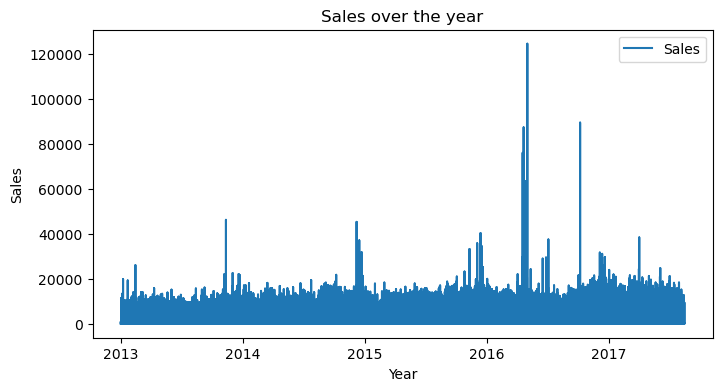

In [19]:
# Data Visualization on sales
plt.figure(figsize=(8, 4))
plt.plot(df['date'], df['sales'], label='Sales')
plt.title('Sales over the year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.show()

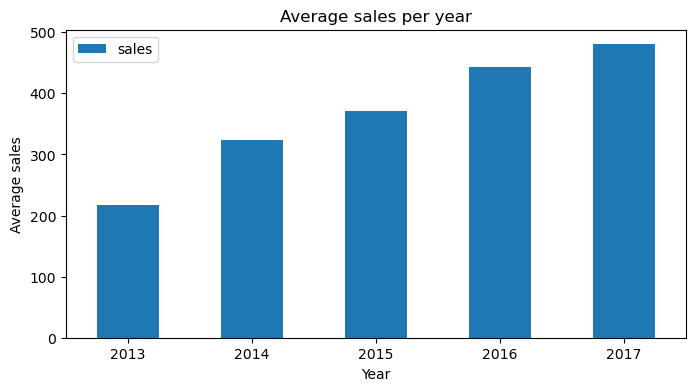

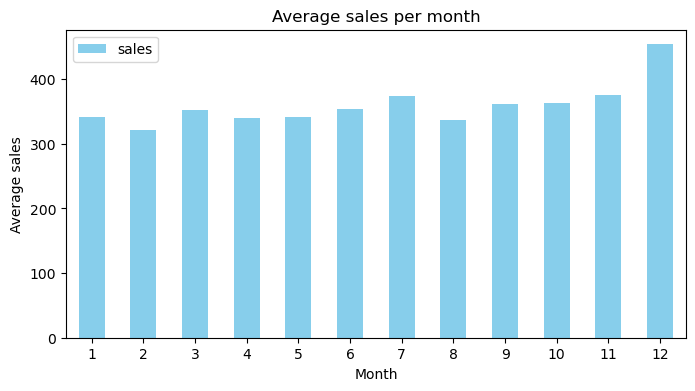

In [25]:
# Visualize average sales per year
plt.figure(figsize=(8,4))
df.groupby('year')['sales'].mean().plot(kind='bar')
plt.title('Average sales per year')
plt.xlabel('Year')
plt.ylabel('Average sales')
plt.xticks(rotation=0)
plt.legend()
plt.show()

# Visualize average sales per month
plt.figure(figsize=(8,4))
df.groupby('month')['sales'].mean().plot(kind='bar', color='skyblue')
plt.title('Average sales per month')
plt.xlabel('Month')
plt.ylabel('Average sales')
plt.xticks(rotation=0)
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

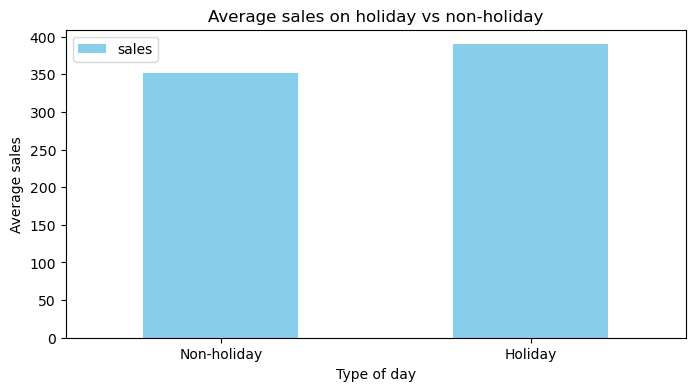

In [29]:
# Difference between average sales on holiday vs non-holiday
# create a column for sales on holiday
df['is_holiday']= df['date'].isin(holiday['date'])
# visualization
plt.figure(figsize=(8,4))
df.groupby('is_holiday')['sales'].mean().plot(kind='bar', color='skyblue')
plt.title('Average sales on holiday vs non-holiday')
plt.xlabel('Type of day')
plt.ylabel('Average sales')
plt.xticks([0,1], ['Non-holiday','Holiday'], rotation=0)
plt.legend()
plt.show


# 4. Execute using PostgreSQL 

In [12]:
# import postgresql package
import psycopg2 as pg2
# connect VSCode to postgresql database
conn = pg2.connect(database='store_sales', user='postgres',password='12345678')
cur = conn.cursor()

In [13]:
query1 = '''
        CREATE TABLE new_table (
            userid integer
            , tmstmp timestamp
            , type varchar(10)
        )
        ;
        '''